<a href="https://colab.research.google.com/github/victortrigo/brats2021/blob/proyecto_tesis/brats2021_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_DIR = '/content/drive/MyDrive/brats2021/dataset'
x_train_dir = os.path.join(DATA_DIR, 'X_train')
y_train_dir = os.path.join(DATA_DIR, 'y_train')

x_valid_dir = os.path.join(DATA_DIR, 'X_val')
y_valid_dir = os.path.join(DATA_DIR, 'y_val')

x_test_dir = os.path.join(DATA_DIR, 'X_test')
y_test_dir = os.path.join(DATA_DIR, 'y_test')

In [4]:
path, dirs, files = next(os.walk(x_train_dir))
dirs_count = len(dirs)
print('numero de elementos de entrenamiento:', dirs_count)

numero de elementos de entrenamiento: 1000


In [5]:
# necrotic tumor core (NCR — label 1),
# peritumoral edematous/invaded tissue (ED — label 2)
# GD-enhancing tumor (ET — label 4)

CLASSES = ['background', 'NCR', 'ED', 'ET']

In [8]:
class Dataset(Dataset):
  def __init__(
      self,
      images_dir,
      masks_dir,
      classes=None,
      augmentation=None,
      preprocessing=None
  ):
    self.ids_x = sorted(os.listdir(images_dir))
    self.ids_y = sorted(os.listdir(masks_dir))

    self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids_x]
    self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids_y]

    #self.class_values = [CLASSES.index(cls.lower()) for cls in classes]
    self.class_values = [CLASSES.index(cls) for cls in classes]
    print(self.class_values)

    self.augmentation = augmentation
    self.preprocessing = preprocessing


  def __len__(self):
    return len(self.ids_x)

  def __getitem__(self, i):
    folder_image = self.images_fps[i]
    folder_mask = self.masks_fps[i]

    files_image = os.listdir(folder_image)
    files_mask = os.listdir(folder_mask)

    image = []
    mask = []

    for file in files_image:
      if file.endswith('seg.nii.gz'):
        img = nib.load(folder_image+'/'+file)
        img_new = np.array(img.get_fdata(caching='fill'))
        mask.append(img_new)

      elif file.endswith('flair.nii.gz'):
        img = nib.load(folder_image+'/'+file)
        img_new = np.array(img.get_fdata(caching='fill'))
        image.append(img_new)

      elif file.endswith('t1.nii.gz'):
        img = nib.load(folder_image+'/'+file)
        img_new = np.array(img.get_fdata(caching='fill'))
        image.append(img_new)

      elif file.endswith('t1ce.nii.gz'):
        img = nib.load(folder_image+'/'+file)
        img_new = np.array(img.get_fdata(caching='fill'))
        image.append(img_new)

      elif file.endswith('t2.nii.gz'):
        img = nib.load(folder_image+'/'+file)
        img_new = np.array(img.get_fdata(caching='fill'))
        image.append(img_new)

    for file in files_mask:
      if file.endswith('seg.nii.gz'):
        img = nib.load(folder_mask+'/'+file)
        img_new = np.array(img.get_fdata(caching='fill'))
        mask.append(img_new)



      image2 = np.asarray(image)
      mask2 = np.asarray(mask)

    return image2, mask2


In [9]:
train_dataset = Dataset(x_train_dir, y_train_dir, CLASSES)
valid_dataset = Dataset(x_valid_dir, y_valid_dir, CLASSES)
test_dataset = Dataset(x_test_dir, y_test_dir, CLASSES)

[0, 1, 2, 3]
[0, 1, 2, 3]
[0, 1, 2, 3]


In [10]:
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)

Text(0.5, 1.0, 'mask')

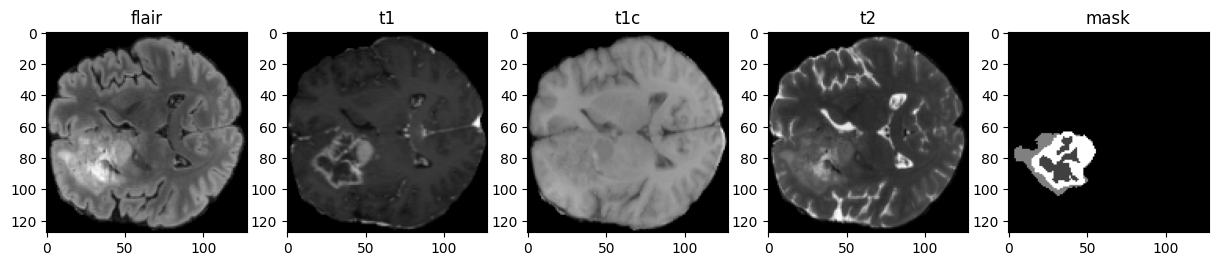

In [14]:
sample = train_dataset.__getitem__(0)

fig, axes = plt.subplots(1,5, figsize=(15,15))
axes[0].imshow(sample[0][0][:,:,64],cmap='gray')
axes[0].set_title('flair')

axes[1].imshow(sample[0][1][:,:,64],cmap='gray')
axes[1].set_title('t1')

axes[2].imshow(sample[0][2][:,:,64],cmap='gray')
axes[2].set_title('t1c')

axes[3].imshow(sample[0][3][:,:,64],cmap='gray')
axes[3].set_title('t2')

axes[4].imshow(sample[1][0][:,:,64],cmap='gray')
axes[4].set_title('mask')

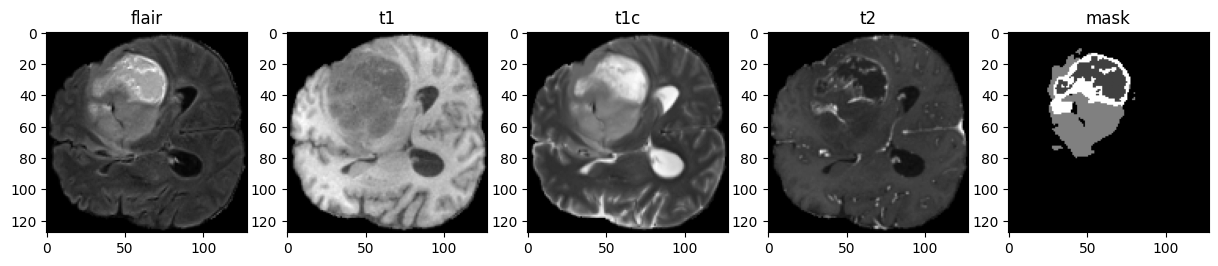

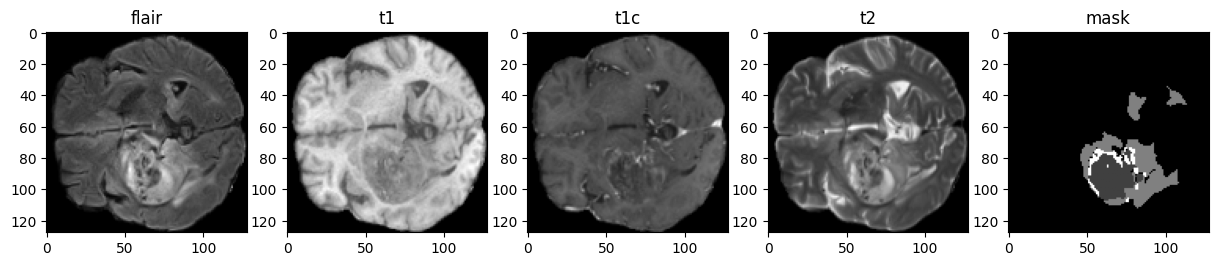

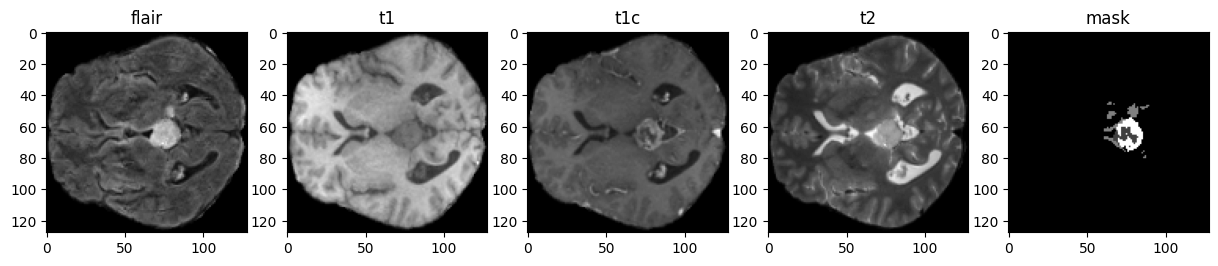

In [17]:
for i in enumerate(train_loader):
  fig, axes = plt.subplots(1,5, figsize=(15,15))
  axes[0].imshow(i[1][0][0][0][:,:,64],cmap='gray')
  axes[0].set_title('flair')

  axes[1].imshow(i[1][0][0][1][:,:,64],cmap='gray')
  axes[1].set_title('t1')

  axes[2].imshow(i[1][0][0][2][:,:,64],cmap='gray')
  axes[2].set_title('t1c')

  axes[3].imshow(i[1][0][0][3][:,:,64],cmap='gray')
  axes[3].set_title('t2')

  axes[4].imshow(i[1][1][0][0][:,:,64],cmap='gray')
  axes[4].set_title('mask')

  if i[0] == 2:
    break